## 1.1 groupby

In [6]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
grouped = tips['tip'].groupby(tips['sex'])
grouped

In [9]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [10]:
date_mean = tips['tip'].groupby([tips['day'],tips['time']]).mean()
date_mean

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Name: tip, dtype: float64

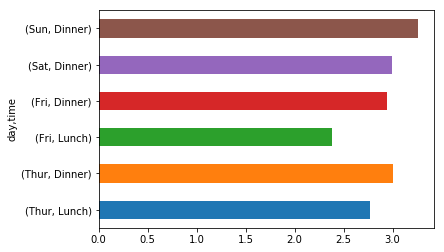

In [11]:
date_mean.plot(kind='barh')

In [9]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [12]:
for name,group in tips.groupby(tips['sex']):
    print(name)
    print(group)

Male
     total_bill   tip   sex smoker   day    time  size
1         10.34  1.66  Male     No   Sun  Dinner     3
2         21.01  3.50  Male     No   Sun  Dinner     3
3         23.68  3.31  Male     No   Sun  Dinner     2
5         25.29  4.71  Male     No   Sun  Dinner     4
6          8.77  2.00  Male     No   Sun  Dinner     2
7         26.88  3.12  Male     No   Sun  Dinner     4
8         15.04  1.96  Male     No   Sun  Dinner     2
9         14.78  3.23  Male     No   Sun  Dinner     2
10        10.27  1.71  Male     No   Sun  Dinner     2
12        15.42  1.57  Male     No   Sun  Dinner     2
13        18.43  3.00  Male     No   Sun  Dinner     4
15        21.58  3.92  Male     No   Sun  Dinner     2
17        16.29  3.71  Male     No   Sun  Dinner     3
19        20.65  3.35  Male     No   Sat  Dinner     3
20        17.92  4.08  Male     No   Sat  Dinner     2
23        39.42  7.58  Male     No   Sat  Dinner     4
24        19.82  3.18  Male     No   Sat  Dinner     2
25   

## 1.2 按列名分组

In [13]:
smoker_mean = tips.groupby('smoker').mean()
smoker_mean

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


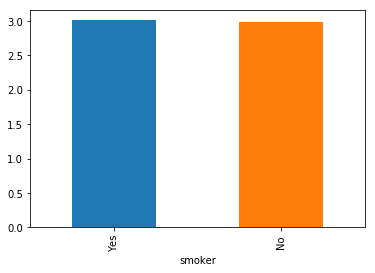

In [14]:
smoker_mean['tip'].plot(kind='bar')

In [15]:
size_mean1 = tips['tip'].groupby(tips['size']).mean()
size_mean1

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [16]:
size_mean2 = tips.groupby('size')['tip'].mean()  #语法糖
size_mean2

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

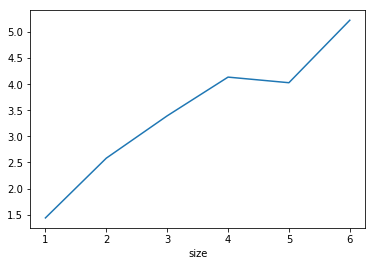

In [17]:
size_mean2.plot()

## 1.3 按列表或数组分组

In [18]:
df = DataFrame(np.arange(16).reshape(4,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [19]:
list1 = ['a','b','a','b']

In [20]:
df.groupby(list1).sum()

,0,1,2,3
a,8,10,12,14
b,16,18,20,22


## 1.4 按字典分组

In [21]:
df = DataFrame(np.random.normal(size=(6,6)),index=['a','b','c','A','B','C'])
df

,0,1,2,3,4,5
a,-1.349358,0.307146,-1.474952,-0.315342,-0.064389,0.737706
b,1.107227,0.704274,-0.549073,-0.035530,-0.750232,-0.215556
c,0.255457,0.344342,0.947208,0.716185,1.660997,-0.848298
A,-1.140678,-0.449718,-0.536389,1.364126,1.573430,-0.567523
B,1.369882,-0.847253,2.234646,1.883332,0.419068,-0.353645
C,1.023036,0.530087,-0.496403,0.308715,1.363614,-0.960263


In [22]:
dict1 = {
    'a':'one',
    'A':'one',
    'b':'two',
    'B':'two',
    'c':'three',
    'C':'three'
}

In [23]:
df.groupby(dict1).sum()

,0,1,2,3,4,5
one,-2.490036,-0.142572,-2.011341,1.048784,1.509041,0.170182
three,1.278493,0.874430,0.450804,1.024901,3.024610,-1.808561
two,2.477109,-0.142980,1.685573,1.847803,-0.331164,-0.569201


## 按函数分组

In [24]:
df = DataFrame(np.random.randn(4,4))
df

,0,1,2,3
0,-0.115930,0.107925,-0.045607,-0.615713
1,-0.585695,-1.702733,1.849243,1.945186
2,0.109337,-0.691467,0.175335,-0.487665
3,0.153572,2.083172,-0.919966,0.165630


In [25]:
def jug(x):
    if x >= 0:
        return 'a'
    else:
        return 'b'

In [26]:
df[3].groupby(df[3].map(jug)).sum()

3
a    2.110817
b   -1.103378
Name: 3, dtype: float64

## 2.1 聚合函数

In [27]:
max_tip = tips.groupby('sex')['tip'].max()
max_tip

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

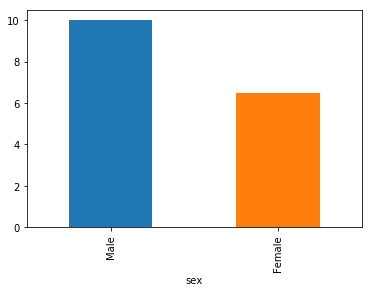

In [28]:
max_tip.plot(kind='bar')

In [29]:
def get_range(x):
    return x.max()-x.min()

In [30]:
tips_range = tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Male      9.0
Female    5.5
Name: tip, dtype: float64

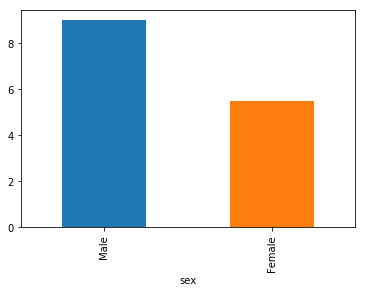

In [31]:
tips_range.plot(kind='bar')

## 多函数应用

In [32]:
tips.groupby(['sex','smoker'])['tip'].agg(['mean','std',get_range])

mean       std  get_range
sex    smoker                               
Male   Yes     3.051167  1.500120       9.00
       No      3.113402  1.489559       7.75
Female Yes     2.931515  1.219916       5.50
       No      2.773519  1.128425       4.20

In [33]:
tips.groupby(['sex','smoker'])['tip'].agg([('tip_mean','mean'),('Range',get_range)])

tip_mean  Range
sex    smoker                 
Male   Yes     3.051167   9.00
       No      3.113402   7.75
Female Yes     2.931515   5.50
       No      2.773519   4.20

In [34]:
tips.groupby(['day','time'])['total_bill','tip'].agg([('tip_mean','mean'),('Range',get_range)])

total_bill              tip      
              tip_mean  Range  tip_mean Range
day  time                                    
Thur Lunch   17.664754  35.60  2.767705  5.45
     Dinner  18.780000   0.00  3.000000  0.00
Fri  Lunch   12.845714   7.69  2.382857  1.90
     Dinner  19.663333  34.42  2.940000  3.73
Sat  Dinner  20.441379  47.74  2.993103  9.00
Sun  Dinner  21.410000  40.92  3.255132  5.49

In [35]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':'sum','tip':'mean'})

total_bill       tip
day  time                        
Thur Lunch      1077.55  2.767705
     Dinner       18.78  3.000000
Fri  Lunch        89.92  2.382857
     Dinner      235.96  2.940000
Sat  Dinner     1778.40  2.993103
Sun  Dinner     1627.16  3.255132

In [36]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':['sum','mean'],'tip':'mean'})

total_bill                  tip
                   sum       mean      mean
day  time                                  
Thur Lunch     1077.55  17.664754  2.767705
     Dinner      18.78  18.780000  3.000000
Fri  Lunch       89.92  12.845714  2.382857
     Dinner     235.96  19.663333  2.940000
Sat  Dinner    1778.40  20.441379  2.993103
Sun  Dinner    1627.16  21.410000  3.255132

In [37]:
no_index = tips.groupby(['sex','smoker'],as_index=False)['tip'].mean()
no_index

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519


## 3 分组运算：apply方法

In [38]:
def top(x,n=5):
    return x.sort_values(by='tip',ascending=False)[-n:]

In [39]:
tips.groupby('sex').apply(top)

total_bill   tip     sex smoker  day    time  size
sex                                                           
Male   43         9.68  1.32    Male     No  Sun  Dinner     2
       235       10.07  1.25    Male     No  Sat  Dinner     2
       75        10.51  1.25    Male     No  Sat  Dinner     2
       237       32.83  1.17    Male    Yes  Sat  Dinner     2
       236       12.60  1.00    Male    Yes  Sat  Dinner     2
Female 215       12.90  1.10  Female    Yes  Sat  Dinner     2
       0         16.99  1.01  Female     No  Sun  Dinner     2
       111        7.25  1.00  Female     No  Sat  Dinner     1
       67         3.07  1.00  Female    Yes  Sat  Dinner     1
       92         5.75  1.00  Female    Yes  Fri  Dinner     2

In [40]:
tips.groupby('sex',group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size
43,9.68,1.32,Male,No,Sun,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [41]:
data = {
    'name':['张三', '李四', 'peter', '王五', '小明', '小红'],
    'sex':['female', 'female', 'male', 'male','male','female'],
    'math':[67, 72, np.nan, 82, 90, np.nan]
}
df = DataFrame(data)
df['math'] = df['math']
df

,name,sex,math
0,张三,female,67.0
1,李四,female,72.0
2,peter,male,NaN
3,王五,male,82.0
4,小明,male,90.0
5,小红,female,NaN


In [42]:
df.fillna(df['math'].mean())

,name,sex,math
0,张三,female,67.00
1,李四,female,72.00
2,peter,male,77.75
3,王五,male,82.00
4,小明,male,90.00
5,小红,female,77.75


In [43]:
f = lambda x: x.fillna(x.mean())
df.groupby('sex').apply(f)

name     sex  math
sex                          
female 0     张三  female  67.0
       1     李四  female  72.0
       5     小红  female  69.5
male   2  peter    male  86.0
       3     王五    male  82.0
       4     小明    male  90.0

## 4.1 透视表

In [44]:
tips.pivot_table(values='tip',index='sex',columns='smoker')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [45]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum')

smoker,No,Yes
sex,,
Female,149.77,96.74
Male,302.00,183.07


In [46]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum',margins=True)

smoker,No,Yes,All
sex,,,
Female,149.77,96.74,246.51
Male,302.00,183.07,485.07
All,451.77,279.81,731.58


## 4.2 交叉表

In [47]:
cross_table = pd.crosstab(index=tips['day'],columns=tips['size'])
cross_table

size,1,2,3,4,5,6
day,,,,,,
Sun,0,39,15,18,3,1
Sat,2,53,18,13,1,0
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0


In [48]:
df = cross_table.div(cross_table.sum(1),axis=0)
df

size,1,2,3,4,5,6
day,,,,,,
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000


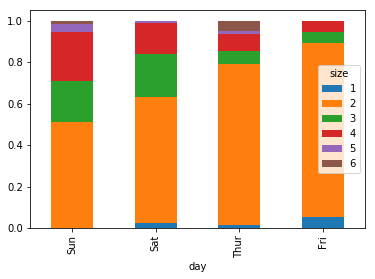

In [49]:
df.plot(kind='bar',stacked = True)

## 5 综合案例：巴尔的摩公务员工资数据集
[数据集下载链接](https://catalog.data.gov/dataset/baltimore-city-employee-salaries-fy2016)

In [50]:
salary = pd.read_csv(open('H:\我的视频录制\从零开始学Python数据分析\data\Baltimore_City_Employee_Salaries_FY2016.csv'))
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,$56705.00,$54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,$75500.00,$72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,$60060.00,$59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,$70000.00,$59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,$64365.00,$74770.82


In [51]:
salary.shape

(13818, 7)

In [52]:
salary.isnull().sum()

Name              0
JobTitle          0
AgencyID          0
Agency            0
HireDate          0
AnnualSalary      0
GrossPay        272
dtype: int64

In [53]:
salary = salary.dropna()

In [54]:
salary.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
GrossPay        0
dtype: int64

In [55]:
salary['AnnualSalary'] = salary['AnnualSalary'].str.strip('$')
salary['GrossPay'] = salary['GrossPay'].str.strip('$')
salary[['AnnualSalary','GrossPay']].head()

,AnnualSalary,GrossPay
0,56705.00,54135.44
1,75500.00,72445.87
2,60060.00,59602.58
3,70000.00,59517.21
4,64365.00,74770.82


In [56]:
salary['GrossPay'].dtype

dtype('O')

In [57]:
salary['AnnualSalary'] = salary['AnnualSalary'].astype(float)
salary['GrossPay'] = salary['GrossPay'].astype(float)
salary['GrossPay'].dtype

dtype('float64')

In [58]:
salary['month'] = salary['HireDate'].str.split('/').str[0]
salary[['HireDate','month']].head()

,HireDate,month
0,10/24/1979 12:00:00 AM,10
1,09/25/2006 12:00:00 AM,09
2,05/01/2013 12:00:00 AM,05
3,11/28/2014 12:00:00 AM,11
4,03/30/2011 12:00:00 AM,03


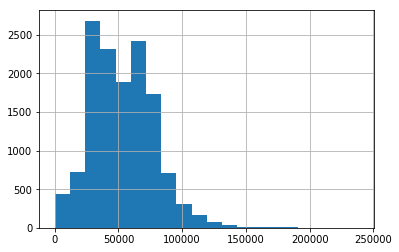

In [59]:
salary['AnnualSalary'].hist(bins=20)

In [60]:
month_count = salary['month'].value_counts()
month_count

06    1468
08    1283
09    1227
07    1198
10    1185
11    1099
01    1097
12    1035
05    1023
03    1018
04     967
02     946
Name: month, dtype: int64

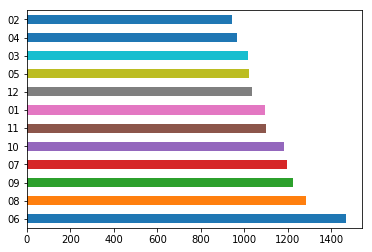

In [61]:
month_count.plot(kind='barh')

In [63]:
agg_salary = salary.groupby('JobTitle')['AnnualSalary'].agg(['mean','count'])
agg_salary.head(10)

,mean,count
JobTitle,,
911 LEAD OPERATOR,49816.750000,4
911 OPERATOR,44829.461538,65
911 OPERATOR SUPERVISOR,57203.500000,4
ACCOUNT EXECUTIVE,57200.000000,4
ACCOUNTANT I,49065.866667,15
ACCOUNTANT II,58172.640000,25
ACCOUNTANT SUPV,67417.142857,7
ACCOUNTANT TRAINEE,36681.000000,1
ACCOUNTING ASST I,29226.333333,6


In [64]:
sort_salary = agg_salary.sort_values(by='mean',ascending=False)[:5]
sort_salary

,mean,count
JobTitle,,
STATE'S ATTORNEY,238772.0,1
Police Commissioner,200000.0,1
Executive Director V,182500.0,1
MAYOR,171635.0,1
Executive Director III,171306.5,10


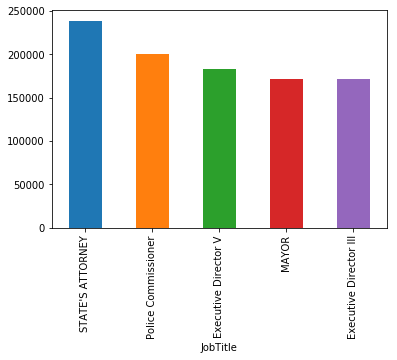

In [65]:
sort_salary['mean'].plot(kind='bar')

In [66]:
sort_count = agg_salary.sort_values(by='count',ascending=False)[:5]
sort_count

,mean,count
JobTitle,,
POLICE OFFICER,70396.973804,1756
LABORER (Hourly),31274.818512,551
EMT Firefighter Suppression,63688.088319,351
RECREATION ARTS INSTRUCTOR,24420.313480,319
OFFICE SUPPORT SPECIALIST III,35560.003300,303


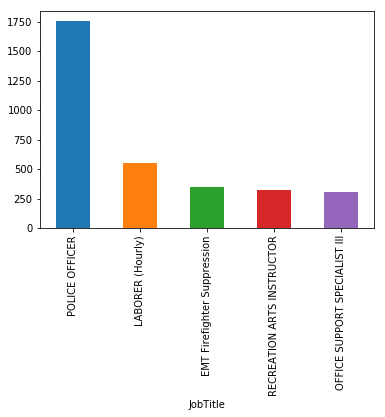

In [67]:
sort_count['count'].plot(kind='bar')